### Network Intrusion Detection
This project will be using the Network Intrusion Detection dataset fetched from Kaggle. The dataset consists of a wide variety of intrusion simulated in a military network environment.

In [1]:
from pathlib import Path
import pandas as pd

path_dir = Path().resolve()
datasets = path_dir / "datasets"
datasets

PosixPath('/Users/ajborbz/Projects/DataScience_AI_ML/projects/Machine_Learning_for_Cybersecurity/datasets')

In [2]:
training_data = datasets / "Train_data.csv"
test_data = datasets / "Test_data.csv"

In [3]:
df_train = pd.read_csv(training_data)
df_test = pd.read_csv(test_data)


## Getting to know the dataset!

In [4]:
df_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [5]:
df_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,tcp,private,REJ,0,0,0,0,0,0,...,255,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00
1,0,tcp,private,REJ,0,0,0,0,0,0,...,255,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,134,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,3,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,29,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71


In [6]:
df_train.shape

(25192, 42)

In [7]:
df_test.shape

(22544, 41)

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [9]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,25192.0,305.054104,2.686556e+03,0.0,0.00,0.00,0.00,42862.0
src_bytes,25192.0,24330.628215,2.410805e+06,0.0,0.00,44.00,279.00,381709090.0
dst_bytes,25192.0,3491.847174,8.883072e+04,0.0,0.00,0.00,530.25,5151385.0
land,25192.0,0.000079,8.909946e-03,0.0,0.00,0.00,0.00,1.0
wrong_fragment,25192.0,0.023738,2.602208e-01,0.0,0.00,0.00,0.00,3.0
urgent,25192.0,0.000040,6.300408e-03,0.0,0.00,0.00,0.00,1.0
hot,25192.0,0.198039,2.154202e+00,0.0,0.00,0.00,0.00,77.0
num_failed_logins,25192.0,0.001191,4.541818e-02,0.0,0.00,0.00,0.00,4.0
logged_in,25192.0,0.394768,4.888105e-01,0.0,0.00,0.00,1.00,1.0
num_compromised,25192.0,0.227850,1.041735e+01,0.0,0.00,0.00,0.00,884.0


In [10]:
object_cols = df_train.select_dtypes(include=['object'])

In [11]:
object_cols

,protocol_type,service,flag,class
0,tcp,ftp_data,SF,normal
1,udp,other,SF,normal
2,tcp,private,S0,anomaly
3,tcp,http,SF,normal
4,tcp,http,SF,normal
...,...,...,...,...
25187,tcp,exec,RSTO,anomaly
25188,tcp,ftp_data,SF,anomaly
25189,tcp,private,REJ,anomaly
25190,tcp,nnsp,S0,anomaly


In [12]:
X, y = df_train.iloc[:,:-1], df_train.iloc[:,-1]

y

0         normal
1         normal
2        anomaly
3         normal
4         normal
          ...   
25187    anomaly
25188    anomaly
25189    anomaly
25190    anomaly
25191    anomaly
Name: class, Length: 25192, dtype: object

In [13]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df_ = df_train.copy()

label_encoders = {}
for col in object_cols:
    le = LabelEncoder()
    df_[col] = le.fit_transform(df_[col])
    label_encoders[col] = le


numeric_df = df_.select_dtypes(include=[np.number])


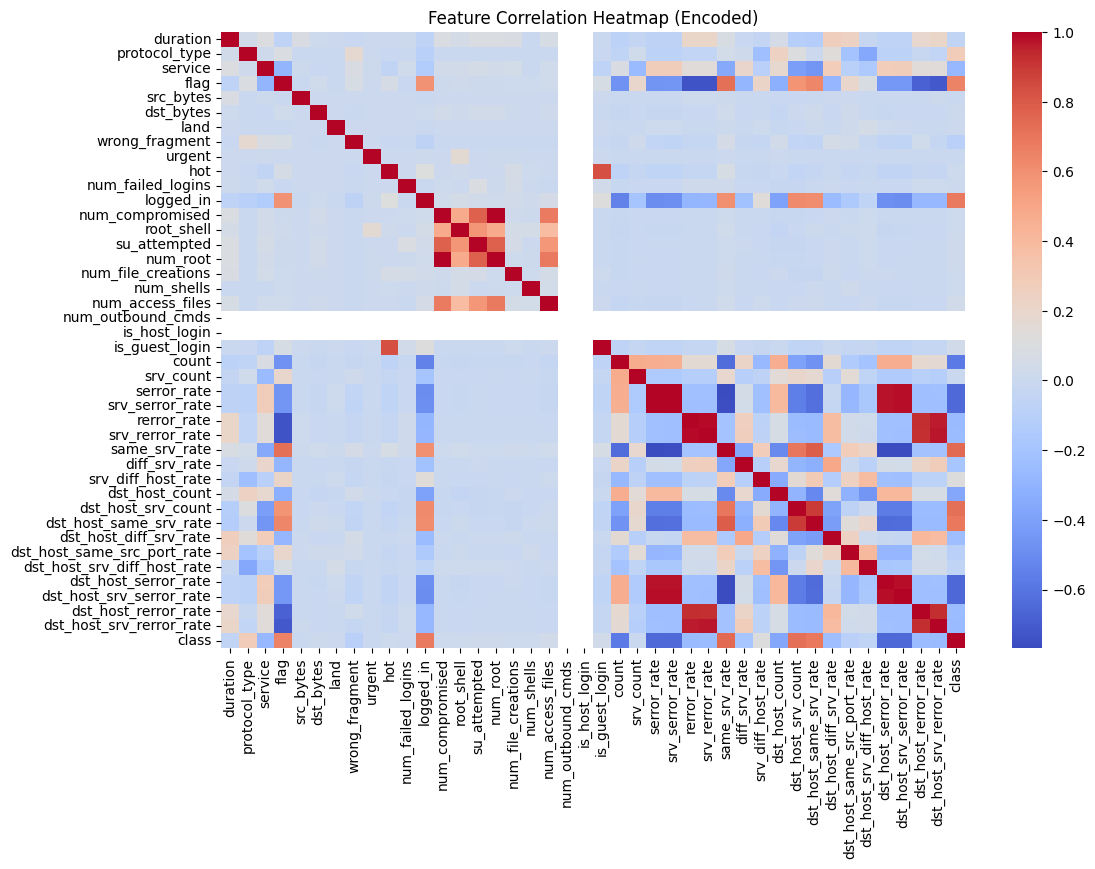

In [14]:
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap (Encoded)")
plt.show()

In [15]:
columns_to_drop = [
    "num_outbound_cmds", 
    "is_host_login", 
    "dst_host_same_srv_rate", 
    "same_srv_rate", 
    "dst_host_srv_diff_host_rate"
]

df_train.drop(columns=columns_to_drop, inplace=True)
df_test.drop(columns=columns_to_drop, inplace=True) 

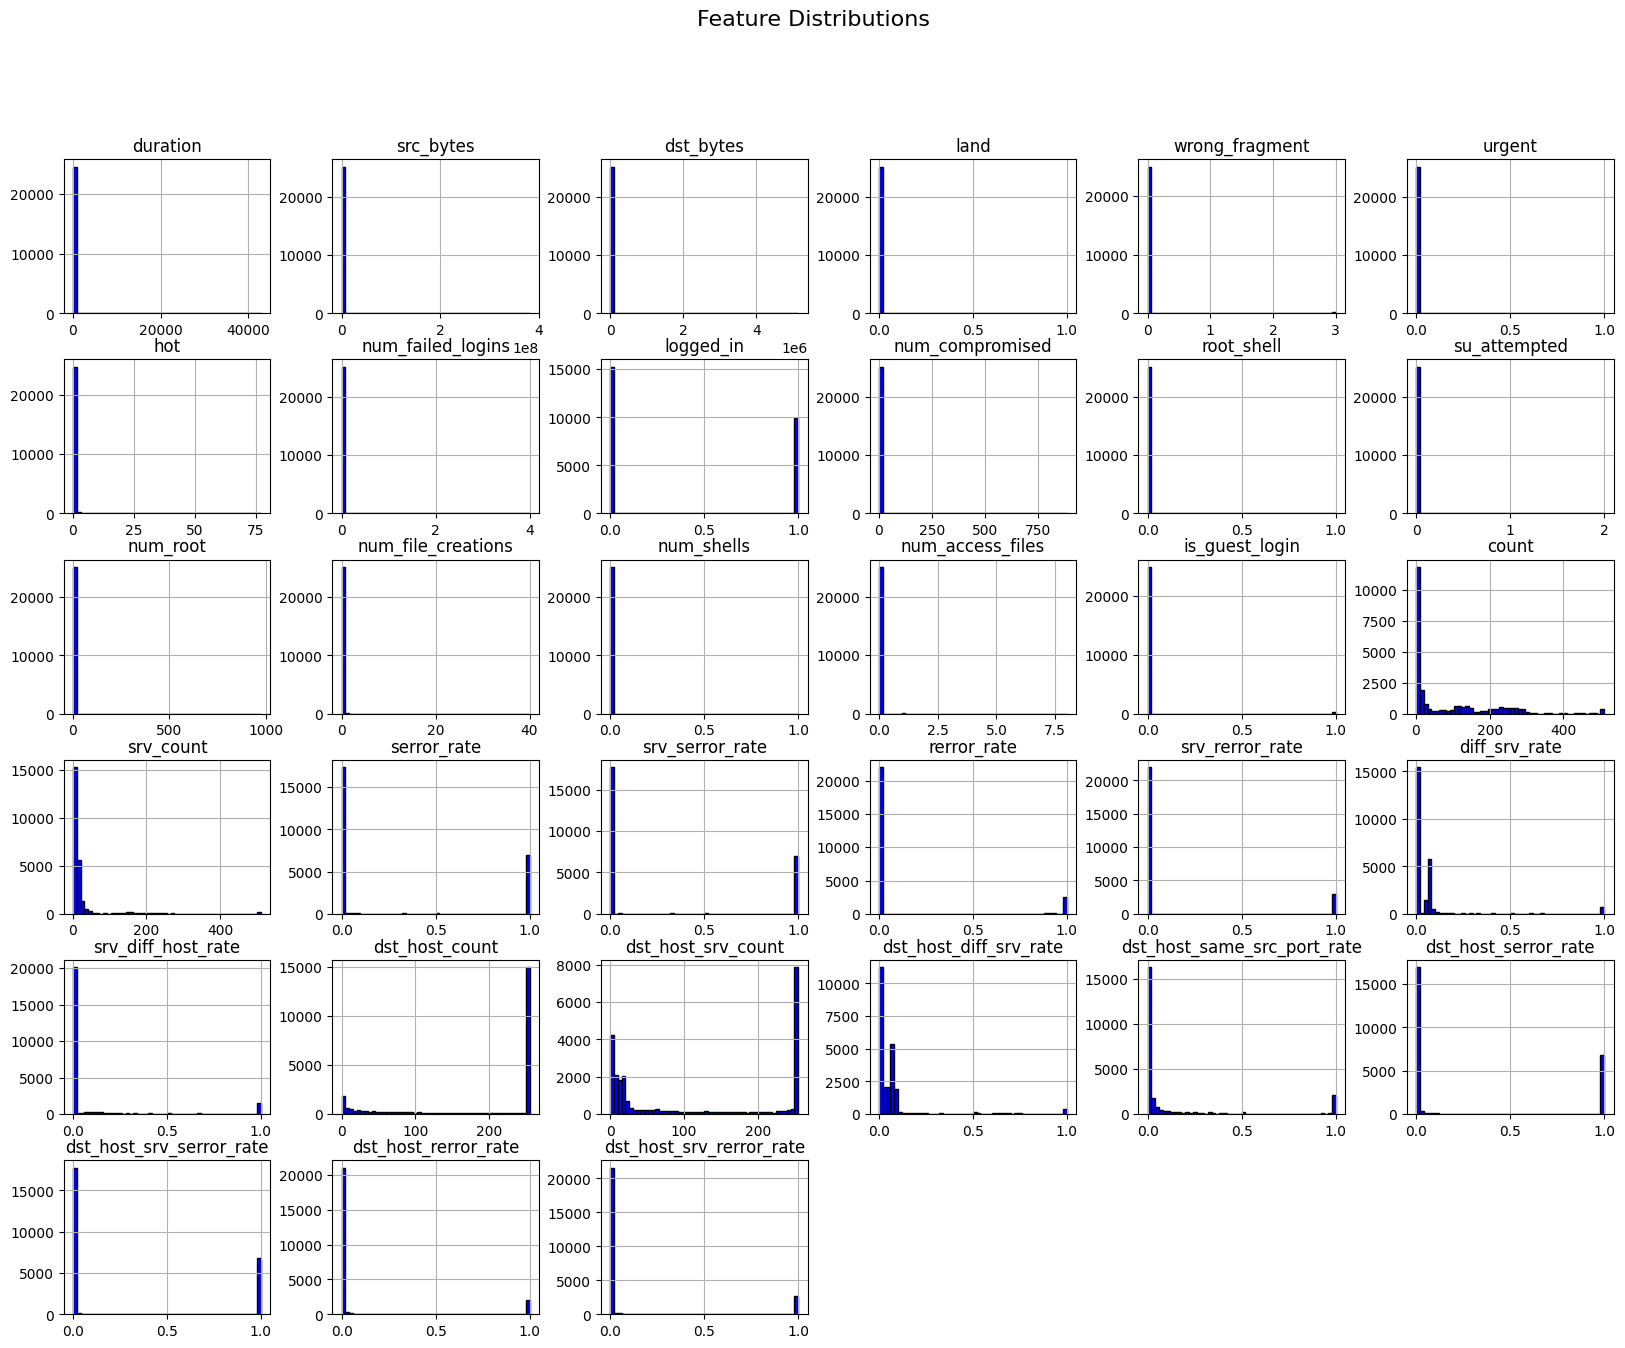

In [16]:
df_train.hist(figsize=(20, 15), bins=50, color="blue", edgecolor="black")
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

In [17]:
skewed_features = ["src_bytes", "dst_bytes", "count"]
for col in skewed_features:
    df_train[col] = np.log1p(df_train[col])
    df_test[col] = np.log1p(df_test[col])

/var/folders/h0/1qbsqb5s27qgqgpdmd83xrx00000gn/T/ipykernel_3837/3428831054.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_train['class'], y=df_train['src_bytes'], palette="coolwarm")


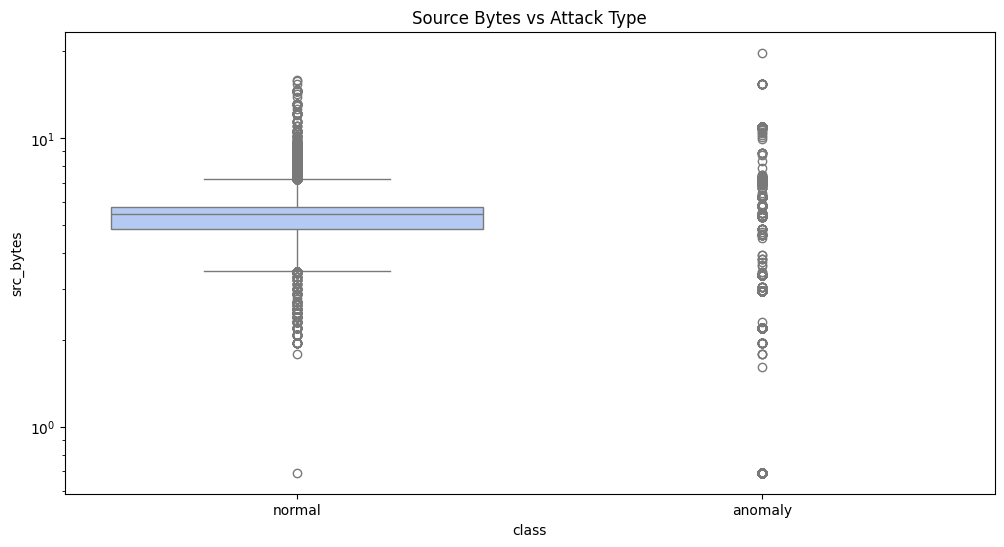

In [18]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_train['class'], y=df_train['src_bytes'], palette="coolwarm")
plt.title("Source Bytes vs Attack Type")
plt.yscale("log")  # Apply log scale for better visualization
plt.show()

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_train["src_bytes"] = scaler.fit_transform(df_train[["src_bytes"]])
df_test["src_bytes"] = scaler.transform(df_test[["src_bytes"]])

In [20]:
correlation = numeric_df.corr()['class'].sort_values(ascending=False)
print(correlation)

class                          1.000000
same_srv_rate                  0.749237
dst_host_srv_count             0.719292
dst_host_same_srv_rate         0.692212
logged_in                      0.688084
flag                           0.651309
protocol_type                  0.283653
srv_diff_host_rate             0.120649
is_guest_login                 0.038662
num_access_files               0.036999
su_attempted                   0.025851
num_root                       0.019753
num_compromised                0.018620
root_shell                     0.018579
num_file_creations             0.018322
num_shells                     0.013454
hot                            0.012839
dst_bytes                      0.010949
num_failed_logins             -0.000028
land                          -0.000605
srv_count                     -0.002370
src_bytes                     -0.005743
urgent                        -0.006743
duration                      -0.050901
dst_host_srv_diff_host_rate   -0.062928


In [21]:
# Drop features highly correlated with others (threshold = 0.9)
corr_matrix = numeric_df.corr()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
highly_correlated_features = [column for column in upper.columns if any(upper[column] > 0.9)]

print("Dropped Features:", highly_correlated_features)
numeric_df = numeric_df.drop(columns=highly_correlated_features)

Dropped Features: ['num_root', 'srv_serror_rate', 'srv_rerror_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']


In [22]:
from sklearn.model_selection import train_test_split

# Define X (features) and y (target)
X = numeric_df.drop(columns=['class'])  # Features
y = numeric_df['class']  # Target variable

# Split data into 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)

Training Set Shape: (20153, 34)
Testing Set Shape: (5039, 34)


### Using RandomForestClassifier

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9976185751141099
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2365
           1       1.00      1.00      1.00      2674

    accuracy                           1.00      5039
   macro avg       1.00      1.00      1.00      5039
weighted avg       1.00      1.00      1.00      5039



### Using XGBoost

In [26]:
from xgboost import XGBClassifier

# Initialize and train XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Predict on test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate model
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))

XGBoostError: 
XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed
    - vcomp140.dll or libgomp-1.dll for Windows
    - libomp.dylib for Mac OSX
    - libgomp.so for Linux and other UNIX-like OSes
    Mac OSX users: Run `brew install libomp` to install OpenMP runtime.

  * You are running 32-bit Python on a 64-bit OS

Error message(s): ["dlopen(/Users/ajborbz/Projects/DataScience_AI_ML/projects/venv/lib/python3.13/site-packages/xgboost/lib/libxgboost.dylib, 0x0006): Library not loaded: @rpath/libomp.dylib\n  Referenced from: <54A1AE05-1E14-3DA2-A8D0-062134694298> /Users/ajborbz/Projects/DataScience_AI_ML/projects/venv/lib/python3.13/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: tried: '/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file)"]
